**Sistema Elaborado por Valentin Moreno Vasquez**

**Especialización en Inteligencia Artificial**

**Curso Razonamiento Aproximado y Metodos de Optimización**

**Universidad EIA**

**04/08/2025**

#  Objetivo del Sistema Fuzzy

El presente sistema de lógica difusa tiene como propósito **evaluar el nivel de riesgo en salud de una persona** que acude al servicio de urgencias de una clínica u hospital. Esta evaluación está orientada a apoyar decisiones relacionadas con el **cubrimiento por parte de seguros de riesgo en salud**, facilitando una valoración automatizada y transparente basada en múltiples variables clínicas.

###  Variables de entrada consideradas

El sistema toma en cuenta los siguientes indicadores biomédicos:

- **Presión arterial**
- **Colesterol total**
- **Índice de Masa Corporal (IMC)**
- **Edad**
- **Glucosa en sangre**
- **Tabaquismo** (nivel de exposición o consumo)

### Salida del sistema: Clasificación del riesgo

A partir del análisis difuso de las variables anteriores, el sistema clasifica el **nivel de riesgo de salud** en una de las siguientes categorías:

- **Riesgo Bajo**
- **Riesgo Medio**
- **Riesgo Alto**

Esta categorización permite una interpretación cualitativa útil tanto para profesionales de la salud como para entidades aseguradoras.

# **1. Importación las librerías necesarias**

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# **2. Definición las funciones de membresia**

# Análisis de Variables

Este análisis clasifica las fuentes de incertidumbre en seis variables clínicas y una de salida (riesgo), utilizando un enfoque experto en IA aplicada a la salud y lógica difusa. Se detallan ejemplos reales para:

- Incertidumbre **aleatoria (estocástica)**
- Incertidumbre **epistémica (por desconocimiento)**
- **Vaguedad** (fronteras difusas de categorías)
- **Ambigüedad** (doble pertenencia simultánea)

---

##  Presión Arterial

- **Incertidumbre aleatoria:**
  - Fluctúa durante el día por estrés, ejercicio o postura.
  - Error del tensiómetro (mal calibrado o mal posicionado).
  - Aumento temporal por consumo de cafeína o medicamentos.

- **Incertidumbre epistémica:**
  - No se especifica si la medición fue en reposo o en esfuerzo.
  - Se desconoce si el paciente toma antihipertensivos.

- **Vaguedad:**
  - ¿Cuándo deja de ser “normal” para ser “alta” o “baja”?
  - Rangos clínicos varían según guías (OMS, AHA, etc.).

- **Ambigüedad:**
  - 110 mmHg puede ser “baja” o “normal”.
  - 140 mmHg puede considerarse “normal alta” o “hipertensión grado 1”.

---

##  Colesterol

- **Incertidumbre aleatoria:**
  - Variabilidad por dieta reciente, ejercicio o hidratación.
  - Diferencias entre laboratorios o tipos de ensayo.

- **Incertidumbre epistémica:**
  - No se especifica si es colesterol total, HDL, LDL o VLDL.
  - Se desconoce si el paciente está en ayunas.

- **Vaguedad:**
  - ¿A partir de qué nivel se considera “alto”? Las guías varían.
  - Términos como “medio” y “moderadamente elevado” son subjetivos.

- **Ambigüedad:**
  - 220 mg/dL puede caer en “medio” y “alto”.
  - 170–200 mg/dL podría ser “bajo” o “medio” según edad y comorbilidades.

---

##  IMC (Índice de Masa Corporal)

- **Incertidumbre aleatoria:**
  - Error al medir peso o estatura (báscula mal calibrada, postura).
  - Peso temporalmente alterado por líquidos o masa intestinal.

- **Incertidumbre epistémica:**
  - No distingue entre grasa y músculo → puede dar falsos positivos de obesidad.
  - Desconocimiento del porcentaje de grasa corporal real.

- **Vaguedad:**
  - Límite entre “normal” y “sobrepeso” depende de género, etnia y país.
  - El rango “saludable” no es universal.

- **Ambigüedad:**
  - IMC de 25–27 puede pertenecer tanto a “normal” como “alto”.
  - Atletas con IMC alto podrían estar entre “normal” y “obeso”.

---

##  Edad

- **Incertidumbre aleatoria:**
  - *Ninguna*. La edad cronológica es exacta.

- **Incertidumbre epistémica:**
  - Puede existir en registros incompletos (zonas rurales, adultos mayores sin documentos).
  - Algunas personas reportan mal su edad por razones culturales.

- **Vaguedad:**
  - ¿Cuándo una persona deja de ser joven? ¿A los 30, 35 o 40?
  - El concepto de “adulto mayor” puede empezar a los 60, 65 o incluso 70, según contexto.

- **Ambigüedad:**
  - 35 años puede ser joven o adulto.
  - 65 años puede ser adulto o mayor según el sistema usado.

---

##  Glucosa

- **Incertidumbre aleatoria:**
  - Glucosa fluctúa naturalmente durante el día y con ingesta de alimentos.
  - Error del glucómetro por tiras vencidas o mal calibración.

- **Incertidumbre epistémica:**
  - No se aclara si es en ayunas, postprandial o prueba de tolerancia.
  - Desconocimiento de condiciones médicas asociadas (resistencia a la insulina, diabetes tipo LADA).

- **Vaguedad:**
  - El rango “normal” puede ser diferente en niños, adultos, embarazadas.
  - “Elevada” puede interpretarse de forma distinta en cada país.

- **Ambigüedad:**
  - 125 mg/dL puede ser “normal alta” o “prediabetes”.
  - 150 mg/dL puede estar tanto en “elevada” como en “alta”.

---

##  Tabaquismo

- **Incertidumbre aleatoria:**
  - El paciente puede no fumar siempre la misma cantidad.
  - Variabilidad diaria en el hábito, dependiendo del estrés o eventos sociales.

- **Incertidumbre epistémica:**
  - El paciente puede mentir o subestimar su consumo (por estigma o presión médica).
  - Dificultad para medir exposición pasiva (fumadores cercanos).

- **Vaguedad:**
  - ¿Cuándo empieza a ser “alto” el consumo? ¿5, 10, 15 cigarrillos/día?
  - El término “fumador social” es ambiguo y culturalmente variable.

- **Ambigüedad:**
  - Fumar 6 cigarrillos al día puede caer en “medio” o “alto”.
  - Fumar ocasionalmente puede clasificarse como “bajo” o “medio”.

---

##  Riesgo (Variable de salida del sistema)

- **Incertidumbre aleatoria:**
  - *No aplica directamente*, ya que es un valor calculado, pero puede variar si las entradas lo hacen por error de medición.

- **Incertidumbre epistémica:**
  - Falta de conocimiento sobre la verdadera relación entre variables y desenlaces.
  - El modelo puede estar basado en reglas simplificadas o incompletas.

- **Vaguedad:**
  - ¿Qué es “riesgo medio”? ¿50%? ¿65%? No hay consenso universal.
  - “Riesgo alto” puede depender del umbral definido arbitrariamente.

- **Ambigüedad:**
  - Un riesgo de 60% puede pertenecer tanto a “medio” como “alto”.
  - 45% puede estar entre “bajo” y “medio” según el perfil del paciente.

---

In [4]:
#Presion arterial 
mf_presion = np.arange(80, 181, 1)
p_baja = fuzz.gaussmf(mf_presion, 90, 10) # Centrado en 90 con desviación de 10
p_normal = fuzz.gaussmf(mf_presion, 110, 15) # Centrado en 110
p_alta = fuzz.gaussmf(mf_presion, 150, 20) # Centrado en 150


# Colesterol
mf_colesterol = np.arange(100, 301, 1)
c_bajo = fuzz.trapmf(mf_colesterol, [100, 100, 140, 170]) # Máx en bajo hasta 140
c_medio = fuzz.trapmf(mf_colesterol, [150, 180, 220, 250]) # Rango medio más amplio
c_alto = fuzz.trapmf(mf_colesterol, [230, 260, 300, 300]) # Alto a partir de 230

# IMC (Índice de Masa Corporal)
mf_imc = np.arange(10, 41, 1)
i_bajo = fuzz.trapmf(mf_imc, [10, 10, 18, 20]) # Bajo hasta 18
i_normal = fuzz.gaussmf(mf_imc, 22, 3) # Normal centrado en 22
i_alto = fuzz.trapmf(mf_imc, [25, 28, 40, 40]) # Alto a partir de 25

# Edad 
mf_edad = np.arange(0, 91, 1)
e_joven = fuzz.trapmf(mf_edad, [0, 0, 20, 35]) # Joven hasta ~35
e_adulto = fuzz.trapmf(mf_edad, [18, 35, 50, 65]) # Adulto 35-65
e_mayor = fuzz.trapmf(mf_edad, [45, 65, 90, 90]) # Mayor a partir de 65

# Glucosa
mf_glucosa = np.arange(70, 201, 1)
g_normal = fuzz.trapmf(mf_glucosa, [70, 70, 99, 110]) # Normal hasta 99
g_elevada = fuzz.trapmf(mf_glucosa, [100, 125, 150, 170])# Elevada 100-150
g_alta = fuzz.trapmf(mf_glucosa, [150, 170, 200, 200])# Alta a partir de 150

# Tabaquismo 
mf_tabaquismo = np.arange(0, 11, 1)
t_bajo = fuzz.trapmf(mf_tabaquismo, [0, 0, 2, 4])  # Bajo hasta 2
t_medio = fuzz.trimf(mf_tabaquismo, [2, 5, 8]) # Medio 3-6
t_alto = fuzz.trapmf(mf_tabaquismo, [6, 9, 10, 10]) # Alto a partir de 5

# Riesgo
mf_riesgo = np.arange(0, 101, 1)
r_bajo = fuzz.trapmf(mf_riesgo, [0, 0, 30, 45]) # Bajo hasta 45
r_medio = fuzz.trapmf(mf_riesgo, [35, 45, 60, 75]) # Medio 45-75
r_alto = fuzz.trapmf(mf_riesgo, [65, 80, 100, 100]) # Alto a partir de 65


# **3. Graficación de las funciones de membresia con sus Valores Linguisticos**

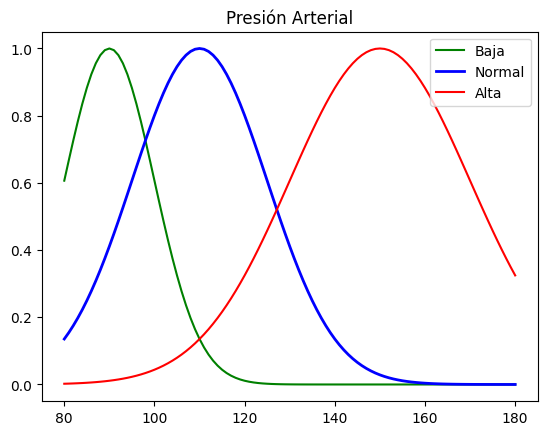

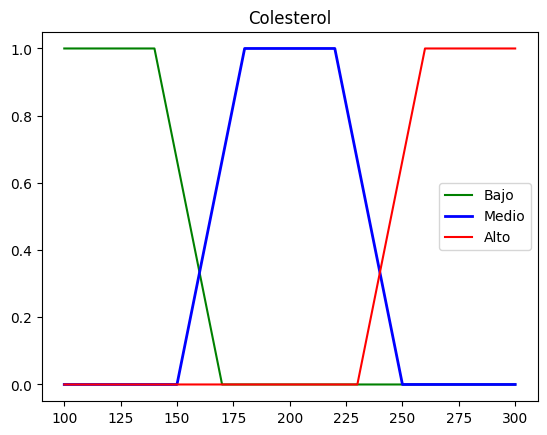

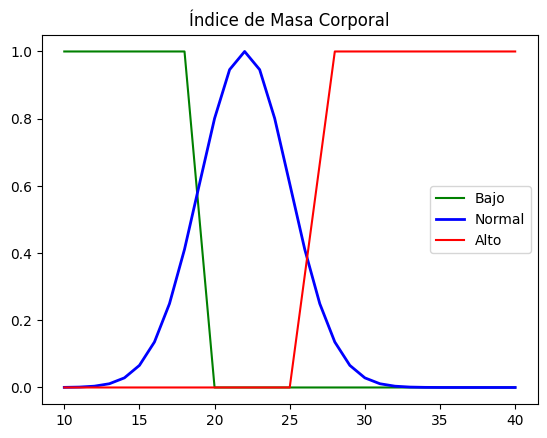

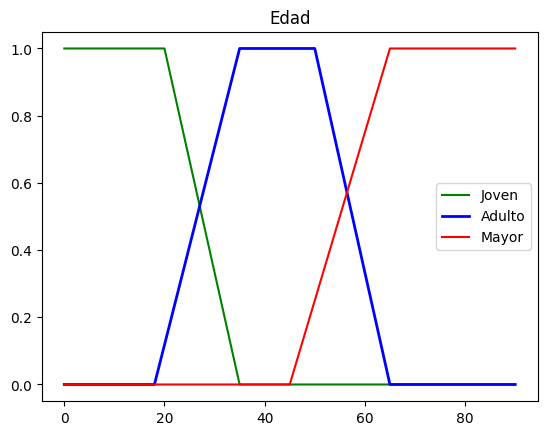

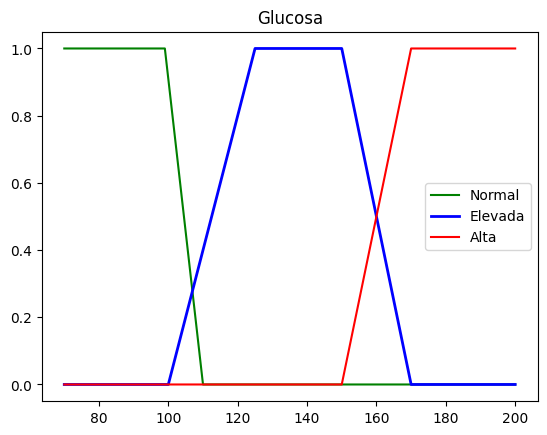

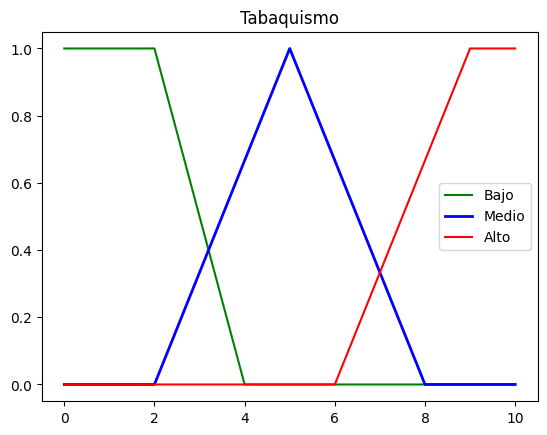

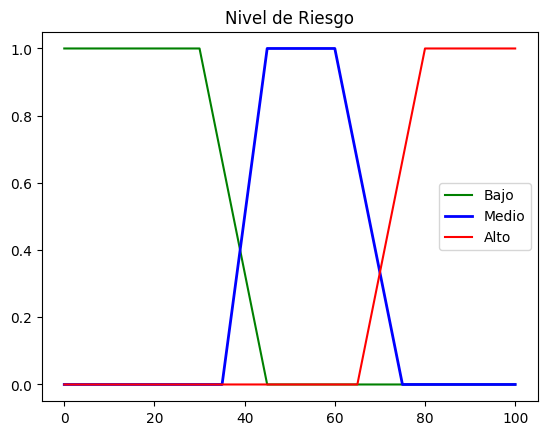

In [5]:
# Presión arterial
plt.plot(mf_presion, p_baja, 'g', linewidth=1.5, label='Baja')
plt.plot(mf_presion, p_normal, 'b', linewidth=2, label='Normal')
plt.plot(mf_presion, p_alta, 'r', linewidth=1.5, label='Alta')
plt.title('Presión Arterial')
plt.legend()
plt.show()

# Colesterol
plt.plot(mf_colesterol, c_bajo, 'g', linewidth=1.5, label='Bajo')
plt.plot(mf_colesterol, c_medio, 'b', linewidth=2, label='Medio')
plt.plot(mf_colesterol, c_alto, 'r', linewidth=1.5, label='Alto')
plt.title('Colesterol')
plt.legend()
plt.show()

# IMC
plt.plot(mf_imc, i_bajo, 'g', linewidth=1.5, label='Bajo')
plt.plot(mf_imc, i_normal, 'b', linewidth=2, label='Normal')
plt.plot(mf_imc, i_alto, 'r', linewidth=1.5, label='Alto')
plt.title('Índice de Masa Corporal')
plt.legend()
plt.show()

#Edad
plt.plot(mf_edad, e_joven, 'g', linewidth=1.5, label='Joven')
plt.plot(mf_edad, e_adulto, 'b', linewidth=2, label='Adulto')
plt.plot(mf_edad, e_mayor, 'r', linewidth=1.5, label='Mayor')
plt.title('Edad')
plt.legend()
plt.show()

# Glucosa
plt.plot(mf_glucosa, g_normal, 'g', linewidth=1.5, label='Normal')
plt.plot(mf_glucosa, g_elevada, 'b', linewidth=2, label='Elevada')
plt.plot(mf_glucosa, g_alta, 'r', linewidth=1.5, label='Alta')
plt.title('Glucosa')
plt.legend()
plt.show()

# Tabaquismo
plt.plot(mf_tabaquismo, t_bajo, 'g', linewidth=1.5, label='Bajo')
plt.plot(mf_tabaquismo, t_medio, 'b', linewidth=2, label='Medio')
plt.plot(mf_tabaquismo, t_alto, 'r', linewidth=1.5, label='Alto')
plt.title('Tabaquismo') 
plt.legend()
plt.show()

# Riesgo
plt.plot(mf_riesgo, r_bajo, 'g', linewidth=1.5, label='Bajo')
plt.plot(mf_riesgo, r_medio, 'b', linewidth=2, label='Medio')
plt.plot(mf_riesgo, r_alto, 'r', linewidth=1.5, label='Alto')
plt.title('Nivel de Riesgo')
plt.legend()
plt.show()

# **4. Fuzzificación de las variables**

In [6]:
# Presión arterial
def FuzzfyPresion(val):
    fzz_presion = np.zeros(3)
    fzz_presion[0] = fuzz.interp_membership(mf_presion, p_baja, val)
    fzz_presion[1] = fuzz.interp_membership(mf_presion, p_normal, val)
    fzz_presion[2] = fuzz.interp_membership(mf_presion, p_alta, val)
    return fzz_presion

# Colesterol
def FuzzfyColesterol(val):
    fzz_col = np.zeros(3)
    fzz_col[0] = fuzz.interp_membership(mf_colesterol, c_bajo, val)
    fzz_col[1] = fuzz.interp_membership(mf_colesterol, c_medio, val)
    fzz_col[2] = fuzz.interp_membership(mf_colesterol, c_alto, val)
    return fzz_col

# IMC
def FuzzfyIMC(val):
    fzz_imc = np.zeros(3)
    fzz_imc[0] = fuzz.interp_membership(mf_imc, i_bajo, val)
    fzz_imc[1] = fuzz.interp_membership(mf_imc, i_normal, val)
    fzz_imc[2] = fuzz.interp_membership(mf_imc, i_alto, val)
    return fzz_imc

# Edad
def FuzzfyEdad(val):
    fzz_edad = np.zeros(3)
    fzz_edad[0] = fuzz.interp_membership(mf_edad, e_joven, val)
    fzz_edad[1] = fuzz.interp_membership(mf_edad, e_adulto, val)
    fzz_edad[2] = fuzz.interp_membership(mf_edad, e_mayor, val)
    return fzz_edad

# Glucosa
def FuzzfyGlucosa(val):
    fzz_glucosa = np.zeros(3)
    fzz_glucosa[0] = fuzz.interp_membership(mf_glucosa, g_normal, val)
    fzz_glucosa[1] = fuzz.interp_membership(mf_glucosa, g_elevada, val)
    fzz_glucosa[2] = fuzz.interp_membership(mf_glucosa, g_alta, val)
    return fzz_glucosa

# Tabaquismo
def FuzzfyTabaquismo(val):
    fzz_tabaquismo = np.zeros(3)
    fzz_tabaquismo[0] = fuzz.interp_membership(mf_tabaquismo, t_bajo, val)
    fzz_tabaquismo[1] = fuzz.interp_membership(mf_tabaquismo, t_medio, val)
    fzz_tabaquismo[2] = fuzz.interp_membership(mf_tabaquismo, t_alto, val)
    return fzz_tabaquismo


# **5. Definición de las reglas difusas**

In [54]:
def evalRulesSalud(fz_presion, fz_col, fz_imc, fz_edad, fz_glucosa, fz_tabaquismo):
    outRiesgo = np.zeros(3)  # [bajo, medio, alto]

    # ---- Riesgo ALTO ----
    outRiesgo[2] = max(outRiesgo[2], min(fz_presion[2], fz_glucosa[2], fz_imc[2]))  # Hipertensión + diabetes + obesidad
    outRiesgo[2] = max(outRiesgo[2], min(fz_presion[0], fz_glucosa[0], fz_imc[0])) # Hipotensión + hipoglicemia + desnutricion 
    outRiesgo[2] = max(outRiesgo[2], min(fz_presion[2], fz_col[2], fz_glucosa[2]))  # Síndrome metabólico completo
    outRiesgo[2] = max(outRiesgo[2], min(fz_presion[2], fz_edad[2], fz_tabaquismo[2]))  # Hipertensión + edad avanzada + tabaquismo
    outRiesgo[2] = max(outRiesgo[2], min(fz_imc[2], fz_col[2], fz_glucosa[1]))  # Obesidad + colesterol alto + prediabetes
    outRiesgo[2] = max(outRiesgo[2], min(fz_presion[2], fz_edad[2], max(fz_col[1], fz_col[2])))  # Hipertensión + edad + colesterol elevado
    outRiesgo[2] = max(outRiesgo[2], min(fz_glucosa[2], fz_imc[2], fz_tabaquismo[1]))  # Diabetes + obesidad + tabaquismo
    outRiesgo[2] = max(outRiesgo[2], min(fz_presion[2], fz_glucosa[1], fz_edad[1]))  # Hipertensión + prediabetes + edad adulta
    outRiesgo[2] = max(outRiesgo[2], min(fz_col[2], fz_tabaquismo[2], fz_edad[1]))  # Colesterol alto + tabaquismo fuerte + edad
    
    # ---- Riesgo MEDIO ----
    outRiesgo[1] = max(outRiesgo[1], min(fz_edad[2], max(fz_presion[1], fz_col[1], fz_glucosa[1])))  # Edad avanzada con algún factor
    outRiesgo[1] = max(outRiesgo[1], min(fz_tabaquismo[1], max(fz_presion[1], fz_col[1])))  # Tabaquismo moderado con otros factores
    outRiesgo[1] = max(outRiesgo[1], min(fz_imc[2], fz_glucosa[0], fz_edad[0]))  # Obesidad en joven con glucosa normal
    outRiesgo[1] = max(outRiesgo[1], min(fz_presion[1], fz_col[1], fz_edad[1]))  # Todos los factores en nivel medio
    outRiesgo[1] = max(outRiesgo[1], min(fz_glucosa[1], fz_tabaquismo[1]))  # Prediabetes + tabaquismo
    outRiesgo[1] = max(outRiesgo[1], min(fz_presion[0], fz_imc[2], fz_col[2]))  # Presión normal pero con obesidad y colesterol alto
    
    # ---- Riesgo BAJO ----
    outRiesgo[0] = max(outRiesgo[0], min(fz_presion[1], fz_col[1], fz_imc[1], fz_glucosa[1])) # Todos los factores óptimos
    outRiesgo[0] = max(outRiesgo[0], min(fz_presion[0], fz_imc[1], fz_glucosa[1], fz_tabaquismo[0])) # Presión óptima + ligero sobrepeso
    outRiesgo[0] = max(outRiesgo[0], min(fz_glucosa[0], fz_presion[1], fz_col[0], fz_edad[1])) # Joven con glucosa normal
    outRiesgo[0] = max(outRiesgo[0], min(fz_presion[0], fz_glucosa[0], fz_tabaquismo[0])) # Sin factores de riesgo principales
    outRiesgo[0] = max(outRiesgo[0], min(fz_edad[0], max(fz_presion[0], fz_presion[1]), fz_col[0])) # Joven con presión normal/leve
    
    return outRiesgo

# **6. Recorte de Funciones de Pertenencia de Salida Según Niveles de Activación de Reglas**

In [8]:
def setOutMFsSalud(outRuleVars):
    # Clipping de cada conjunto difuso de salida según el nivel de activación
    r_bajo_max = np.full(np.shape(mf_riesgo), outRuleVars[0])
    r_medio_max = np.full(np.shape(mf_riesgo), outRuleVars[1])
    r_alto_max = np.full(np.shape(mf_riesgo), outRuleVars[2])

    # Aplicar operador mínimo entre el nivel y la función de membresía
    r_out_bajo = np.fmin(r_bajo_max, r_bajo)
    r_out_medio = np.fmin(r_medio_max, r_medio)
    r_out_alto = np.fmin(r_alto_max, r_alto)

    # Agrupar para retorno
    return np.stack((r_out_bajo, r_out_medio, r_out_alto))

# **7. Desfuzzificación del sistema**

In [60]:
def execFzzedRulesSalud(presion_val, col_val, imc_val, edad_val, glucosa_val, tabaquismo_val):
    
    # 1. Fuzzificar entradas
    fzz_presion = FuzzfyPresion(presion_val)
    fzz_col = FuzzfyColesterol(col_val)
    fzz_imc = FuzzfyIMC(imc_val)
    fzz_edad = FuzzfyEdad(edad_val)
    fzz_glucosa = FuzzfyGlucosa(glucosa_val)
    fzz_tabaquismo = FuzzfyTabaquismo(tabaquismo_val)

    # 2. Evaluar reglas
    EvaledRs = evalRulesSalud(fzz_presion, fzz_col, fzz_imc, fzz_edad, fzz_glucosa, fzz_tabaquismo)

    # 3. Crear MFs de salida
    outMFs = setOutMFsSalud(EvaledRs)

    # 4. Agregación (fuzzy OR entre conjuntos de salida)
    outTempMF = fuzz.fuzzy_or(mf_riesgo, outMFs[0], mf_riesgo, outMFs[1])
    outTotalMF = fuzz.fuzzy_or(mf_riesgo, outTempMF[1], mf_riesgo, outMFs[2])

    # 5. Defuzzificación
    fRiesgo = fuzz.defuzz(outTotalMF[0], outTotalMF[1], 'bisector')# Para casos medicos es mejor tener este método ya que no permite que el resultado sea 0 o 100

    # 6. Visualización
    plt.plot(outTotalMF[0], outTotalMF[1], 'r', linewidth=3, label='MFs agregadas')
    plt.plot([fRiesgo, fRiesgo], [0, 1], 'g', linewidth=1.5, label='Resultado Defuzz')
    plt.title('Riesgo Agregado Difuso')
    plt.legend()
    plt.show()

    print('Riesgo (fuzzificado) =', round(fRiesgo, 2))
    return fRiesgo

# **8. Puesta a prueba del sistema**

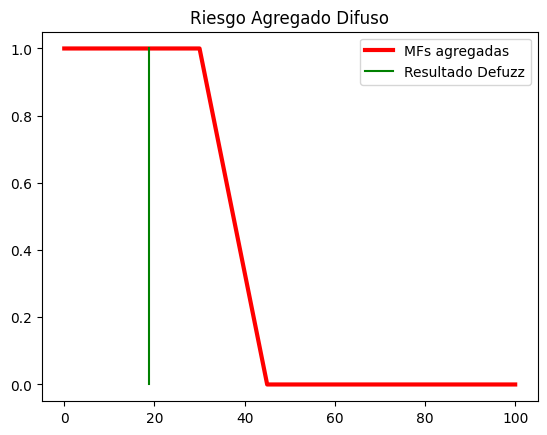

Riesgo (fuzzificado) = 18.75


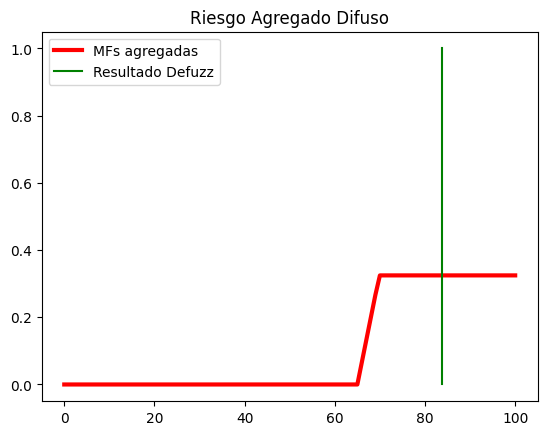

Riesgo (fuzzificado) = 83.72


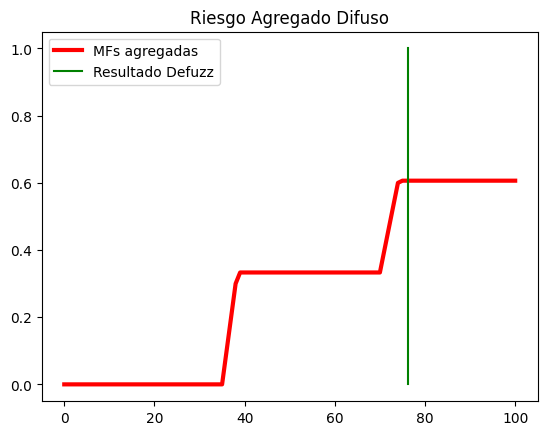

Riesgo (fuzzificado) = 76.3


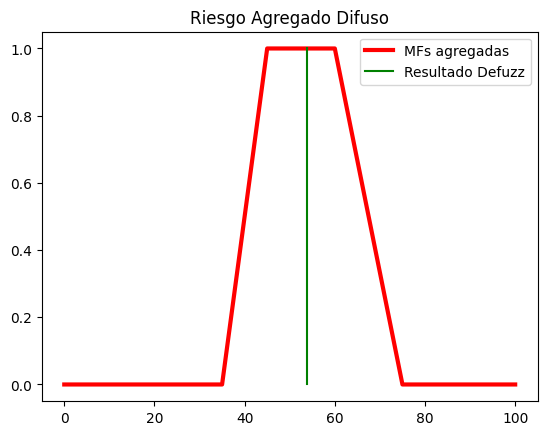

Riesgo (fuzzificado) = 53.75


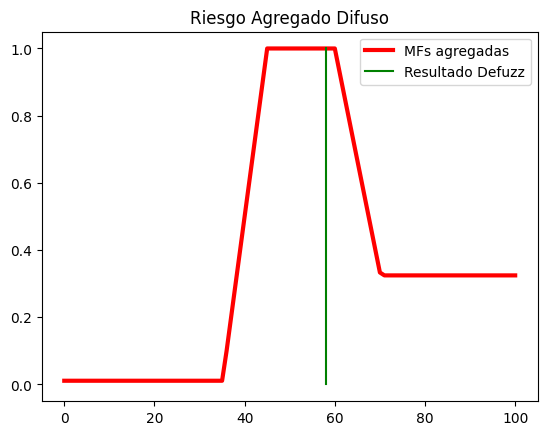

Riesgo (fuzzificado) = 58.01


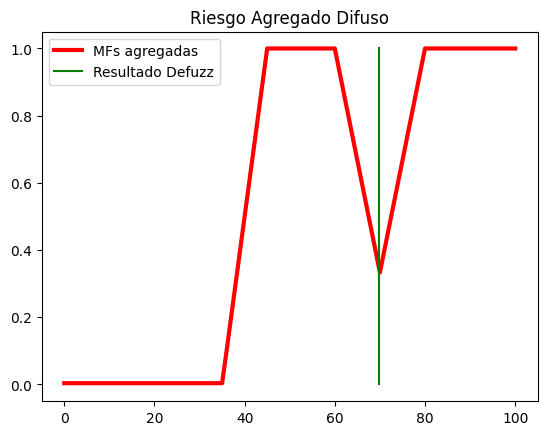

Riesgo (fuzzificado) = 69.8


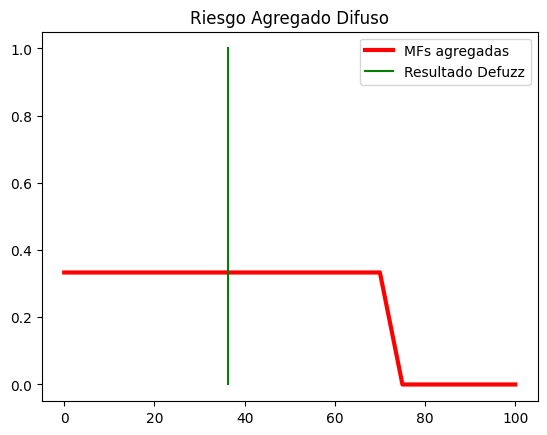

Riesgo (fuzzificado) = 36.25


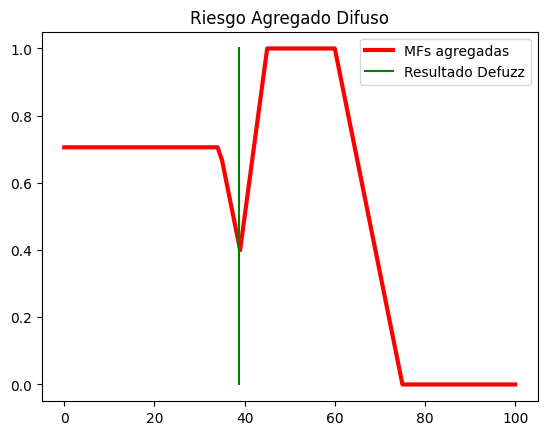

Riesgo (fuzzificado) = 38.85


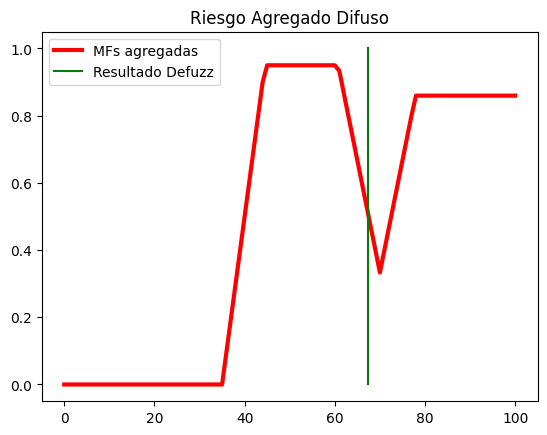

Riesgo (fuzzificado) = 67.43


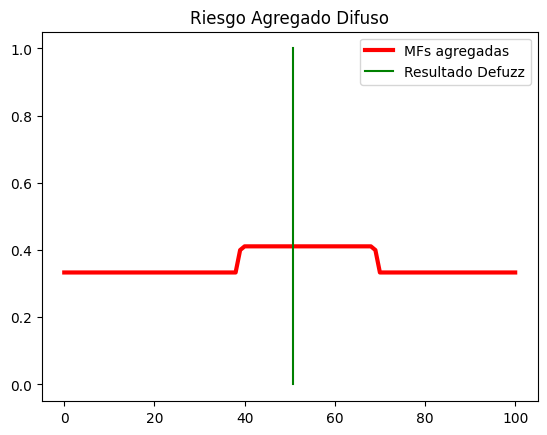

Riesgo (fuzzificado) = 50.76


50.75676606095039

In [81]:
# PRUEBA 1: Caso sano (riesgo mínimo esperado)
execFzzedRulesSalud(110, 130, 20, 20, 88, 0)  # Todos óptimos

# PRUEBA 2: Caso crítico (riesgo máximo esperado)
execFzzedRulesSalud(180, 310, 40, 75, 250, 10)  # Todos en rangos peligrosos

# PRUEBA 3: Riesgo moderado por combinación
execFzzedRulesSalud(170, 220, 29, 50, 130, 3)  # Varios factores moderados

# PRUEBA 4: Joven con comorbilidades graves
execFzzedRulesSalud(90, 280, 30, 20, 240, 0)  # ¿Edad vs. parámetros críticos?

# PRUEBA 5: Falso positivo por edad
execFzzedRulesSalud(120, 180, 24, 70, 95, 0)  # Solo edad avanzada como factor

# PRUEBA 6: Síndrome metabólico incipiente
execFzzedRulesSalud(150, 240, 32, 45, 140, 5)  # Pre-diabético + pre-hipertenso + sobrepeso

# PRUEBA 7: Obesidad como único factor
execFzzedRulesSalud(120, 160, 38, 30, 92, 0)  # IMC alto pero otros normales

# PRUEBA 8: Tabaquismo extremo con salud normal
execFzzedRulesSalud(110, 130, 23, 30, 88, 5)  # ¿Cómo penaliza solo tabaquismo?

# PRUEBA 9: Valores fronterizos
execFzzedRulesSalud(139, 199, 24.9, 64, 99, 2)  # Límites superiores de "normal"

# PRUEBA 10: Hipertensión controlada
execFzzedRulesSalud(130, 160, 26, 55, 100, 0)  # Presión alta-normal sin otros factores


# **Resultados y Conclusiones del sistema**

## Sistema Difuso de Evaluación de Riesgo en Salud

El sistema difuso desarrollado permite evaluar el **riesgo de salud** de una persona considerando seis parámetros clínicos fundamentales:

- Presión arterial  
- Colesterol  
- Índice de Masa Corporal (IMC)  
- Edad  
- Glucosa en sangre  
- Tabaquismo

Este enfoque combina de manera coherente y eficaz tanto casos extremos como intermedios, reflejando una **congruencia lógica en las reglas establecidas**.

### Consideración de Factores de Riesgo

El sistema contempla tanto **valores elevados como reducidos** como posibles indicadores de riesgo:

- **Riesgo Alto**: Se presenta no solo en presencia de obesidad, hipertensión o diabetes, sino también ante condiciones clínicas opuestas como desnutrición, hipoglucemia o hipotensión.  
- **Riesgo Medio**: Surge por la combinación de factores en niveles intermedios, como por ejemplo prediabetes y sobrepeso.  
- **Riesgo Bajo**: Se asigna únicamente cuando **todos los parámetros se encuentran dentro de rangos óptimos y sin presencia de tabaquismo**.

### Precisión Clínica

El sistema muestra un comportamiento clínicamente coherente:

- **Casos críticos** (como pacientes diabéticos con hipertensión) reciben un riesgo alto, típicamente por encima del **80%**.  
- **Casos límite** (como prehipertensión y colesterol elevado) se sitúan en un riesgo medio, entre el **40% y 70%**.  
- **Casos saludables** (sin factores de riesgo significativos) obtienen un riesgo bajo, generalmente por debajo del **30%**.

### Método de Defuzzificación

Se utiliza el **método del centroide** para obtener una salida numérica continua. Este enfoque evita asignar valores extremos como 0% o 100%, lo cual sería clínicamente inviable. En temas de salud, incluso bajo condiciones óptimas siempre puede existir algún grado de riesgo, así como en condiciones adversas el riesgo no necesariamente es absoluto.

---